In [89]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sn
import matplotlib.pyplot as plt

In [90]:
df = pd.read_csv('data_audio_f_mean.csv')

In [91]:
df.shape

(54057, 20)

In [66]:
for column in df:
    print(column)

noise_db
machine_type
model_id
sound
sound_path
target
spectogram
mel_spectogram
chromagram
chromagram_cq
chromagram_cens
mfcc
rms
spectral_centroid
spectral_bandwidth
spectral_contrast
spectral_flatness
roll_off_frequency
tonnetz
zero_crossing_rate


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54057 entries, 0 to 54056
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   noise_db            54057 non-null  int64  
 1   machine_type        54057 non-null  object 
 2   model_id            54057 non-null  int64  
 3   sound               54057 non-null  object 
 4   sound_path          54057 non-null  object 
 5   target              54057 non-null  object 
 6   spectogram          54057 non-null  float64
 7   mel_spectogram      54057 non-null  float64
 8   chromagram          54057 non-null  float64
 9   chromagram_cq       54057 non-null  float64
 10  chromagram_cens     54057 non-null  float64
 11  mfcc                54057 non-null  float64
 12  rms                 54057 non-null  float64
 13  spectral_centroid   54057 non-null  float64
 14  spectral_bandwidth  54057 non-null  float64
 15  spectral_contrast   54057 non-null  float64
 16  spec

In [98]:
df_test = df.iloc[:, 5:20]

In [99]:
df_test.head()

,target,spectogram,mel_spectogram,chromagram,chromagram_cq,chromagram_cens,mfcc,rms,spectral_centroid,spectral_bandwidth,spectral_contrast,spectral_flatness,roll_off_frequency,tonnetz,zero_crossing_rate
0,abnormal,0.095985,0.032898,0.598389,0.335931,0.251026,-4.151321,0.007211,1391.829492,1770.435764,23.832949,0.000225,5660.559507,0.065789,0.053984
1,abnormal,0.083133,0.034875,0.549378,0.386137,0.243251,-4.259758,0.007428,1127.738463,1574.488895,24.478842,0.000103,5120.156046,0.024099,0.043520
2,abnormal,0.120339,0.027383,0.776584,0.321334,0.255388,-3.331495,0.006812,1804.463937,1813.068302,22.781830,0.000449,5696.131759,0.076063,0.084253
3,abnormal,0.095124,0.046161,0.757323,0.373222,0.246073,-3.485691,0.008451,893.927245,1230.738677,21.108826,0.000061,3657.546948,0.044300,0.029228
4,abnormal,0.132093,0.023357,0.862880,0.295585,0.250950,-3.539014,0.006496,2297.372342,1980.079305,22.923389,0.000795,6358.914758,0.077573,0.116914


In [100]:
df_test["target"].replace({"abnormal": "1", "normal": "0"}, inplace=True)

In [101]:
df_test = df_test.astype({"target": int})

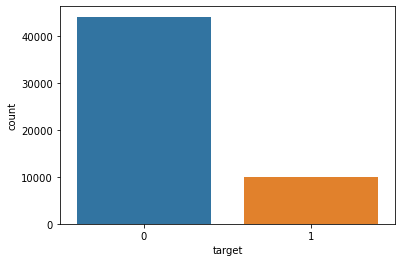

In [46]:
sn.countplot(x=df_test['target']);

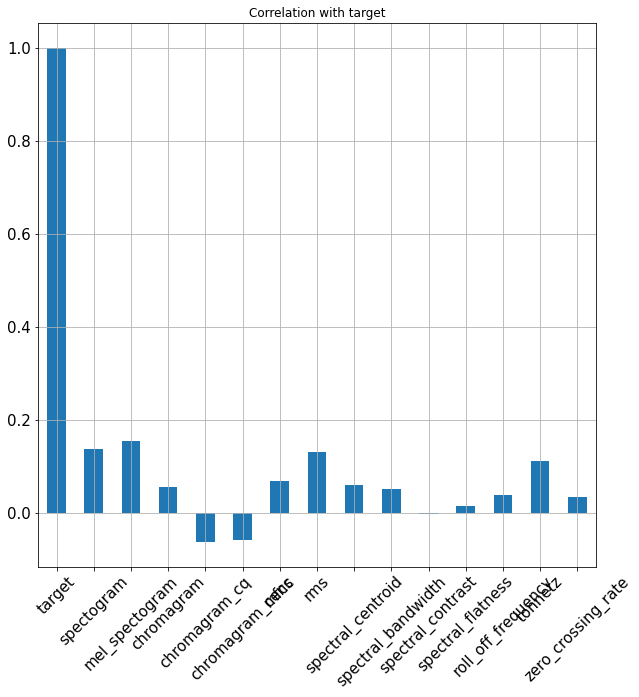

In [102]:
# Correlation with target with respect to attributes
df_test.corrwith(df_test.target).plot.bar(
        figsize = (10, 10), title = "Correlation with target", fontsize = 15,
        rot = 45, grid = True);

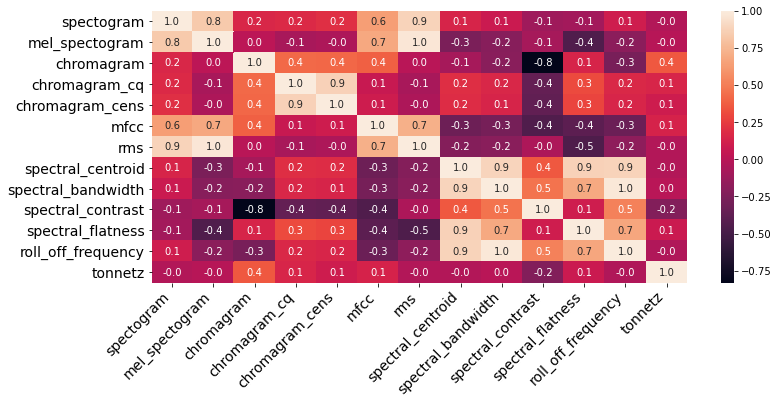

In [88]:
#correlation matrix
plt.figure(figsize=(12,5))
heatmap = sn.heatmap(df_test.corr(), annot=True, fmt=".1f")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=14)
plt.show()

In [103]:
# Correlation matrix
df_test.corr().style.background_gradient(cmap="coolwarm")

,target,spectogram,mel_spectogram,chromagram,chromagram_cq,chromagram_cens,mfcc,rms,spectral_centroid,spectral_bandwidth,spectral_contrast,spectral_flatness,roll_off_frequency,tonnetz,zero_crossing_rate
target,1.000000,0.137173,0.155120,0.056164,-0.062648,-0.058695,0.069416,0.130323,0.060954,0.051837,-0.002992,0.014390,0.039164,0.111806,0.033417
spectogram,0.137173,1.000000,0.836207,0.160078,0.172201,0.200940,0.636568,0.882160,0.143800,0.078300,-0.107494,-0.091799,0.102674,-0.028296,0.175423
mel_spectogram,0.155120,0.836207,1.000000,0.014495,-0.066886,-0.047197,0.685282,0.976999,-0.254886,-0.207491,-0.073687,-0.449970,-0.191539,-0.006216,-0.252054
chromagram,0.056164,0.160078,0.014495,1.000000,0.423348,0.420212,0.391647,0.005468,-0.076139,-0.195992,-0.830903,0.147639,-0.268909,0.357662,-0.015216
chromagram_cq,-0.062648,0.172201,-0.066886,0.423348,1.000000,0.878255,0.066118,-0.070475,0.196979,0.161315,-0.355708,0.309620,0.168927,0.149369,0.285629
chromagram_cens,-0.058695,0.200940,-0.047197,0.420212,0.878255,1.000000,0.095157,-0.048617,0.189267,0.148865,-0.369736,0.288636,0.150672,0.097194,0.270562
mfcc,0.069416,0.636568,0.685282,0.391647,0.066118,0.095157,1.000000,0.718333,-0.318767,-0.279677,-0.448095,-0.392449,-0.329563,0.140190,-0.285818
rms,0.130323,0.882160,0.976999,0.005468,-0.070475,-0.048617,0.718333,1.000000,-0.222548,-0.194400,-0.049150,-0.452839,-0.174059,-0.028228,-0.209614
spectral_centroid,0.060954,0.143800,-0.254886,-0.076139,0.196979,0.189267,-0.318767,-0.222548,1.000000,0.887448,0.359356,0.872565,0.878868,-0.029005,0.940086
spectral_bandwidth,0.051837,0.078300,-0.207491,-0.195992,0.161315,0.148865,-0.279677,-0.194400,0.887448,1.000000,0.457619,0.691764,0.981362,0.003211,0.725847


In [97]:
df_test.columns

Index(['target', 'spectogram', 'mel_spectogram', 'chromagram', 'chromagram_cq',
       'chromagram_cens', 'mfcc', 'rms', 'spectral_centroid',
       'spectral_bandwidth', 'spectral_contrast', 'spectral_flatness',
       'roll_off_frequency', 'tonnetz'],
      dtype='object')

In [104]:
y = df_test['target']

In [105]:
df_test = df_test.drop('target', 1)

In [114]:
# Split dataframe into random train and test subsets

X_train, X_test, Y_train, Y_test = train_test_split(
    df_test,
    y,
    test_size=0.1,
    random_state=200
)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(48651, 14) (48651,)
(5406, 14) (5406,)


In [115]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state = 5, n_estimators = 100,
                                    criterion = 'gini')

In [116]:
random_forest.fit(X_train, Y_train)

RandomForestClassifier(random_state=5)

In [117]:
acc_random_forest = round(random_forest.score(X_test, Y_test) * 100, 2)
acc_random_forest

91.64

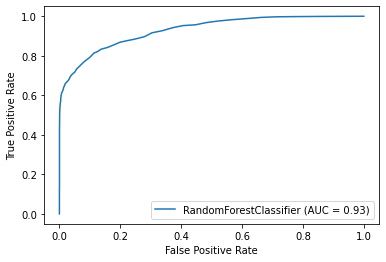

In [118]:
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score

roc = plot_roc_curve(random_forest, X_test, Y_test)

In [119]:
random_forest.feature_importances_

array([0.08572947, 0.11175218, 0.06809019, 0.06726698, 0.05333121,
       0.07079361, 0.10403951, 0.06420904, 0.06312912, 0.05551894,
       0.0560494 , 0.05798915, 0.06794519, 0.07415599])

Feature ranking:
1. feature 1 (0.111752)
2. feature 6 (0.104040)
3. feature 0 (0.085729)
4. feature 13 (0.074156)
5. feature 5 (0.070794)
6. feature 2 (0.068090)
7. feature 12 (0.067945)
8. feature 3 (0.067267)
9. feature 7 (0.064209)
10. feature 8 (0.063129)
11. feature 11 (0.057989)
12. feature 10 (0.056049)
13. feature 9 (0.055519)
14. feature 4 (0.053331)


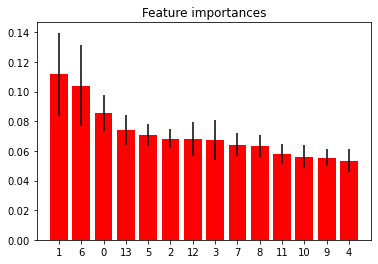

In [120]:
importances = random_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [121]:
df_test

,spectogram,mel_spectogram,chromagram,chromagram_cq,chromagram_cens,mfcc,rms,spectral_centroid,spectral_bandwidth,spectral_contrast,spectral_flatness,roll_off_frequency,tonnetz,zero_crossing_rate
0,0.095985,0.032898,0.598389,0.335931,0.251026,-4.151321,0.007211,1391.829492,1770.435764,23.832949,0.000225,5660.559507,0.065789,0.053984
1,0.083133,0.034875,0.549378,0.386137,0.243251,-4.259758,0.007428,1127.738463,1574.488895,24.478842,0.000103,5120.156046,0.024099,0.043520
2,0.120339,0.027383,0.776584,0.321334,0.255388,-3.331495,0.006812,1804.463937,1813.068302,22.781830,0.000449,5696.131759,0.076063,0.084253
3,0.095124,0.046161,0.757323,0.373222,0.246073,-3.485691,0.008451,893.927245,1230.738677,21.108826,0.000061,3657.546948,0.044300,0.029228
4,0.132093,0.023357,0.862880,0.295585,0.250950,-3.539014,0.006496,2297.372342,1980.079305,22.923389,0.000795,6358.914758,0.077573,0.116914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54052,0.034551,0.002739,0.802271,0.617136,0.275339,-6.947811,0.001996,1446.476415,1671.440936,21.096245,0.000606,5164.221673,-0.001298,0.060233
54053,0.034020,0.002697,0.806781,0.660684,0.276138,-6.969192,0.001992,1360.809800,1581.688194,20.934526,0.000562,4823.112753,0.000193,0.057143
54054,0.038163,0.002331,0.787630,0.595449,0.276895,-6.882100,0.001839,1876.962822,1822.985006,21.804678,0.001175,5669.302687,-0.005797,0.099840
54055,0.034463,0.002563,0.796711,0.662576,0.277408,-6.817162,0.001929,1804.633441,1975.446337,21.788542,0.000927,6180.079258,-0.012141,0.075583


In [85]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score,classification_report, confusion_matrix

In [36]:
y_pred = random_forest.predict(X_test)

In [174]:
print(f1_score(Y_test, y_pred, average="macro"))
print(precision_score(Y_test, y_pred, average="macro"))
print(recall_score(Y_test, y_pred, average="macro")) 

0.8352362714424426
0.9405344459874754
0.7837785079871165


In [37]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      4391
           1       0.97      0.57      0.72      1015

    accuracy                           0.92      5406
   macro avg       0.94      0.78      0.83      5406
weighted avg       0.92      0.92      0.91      5406



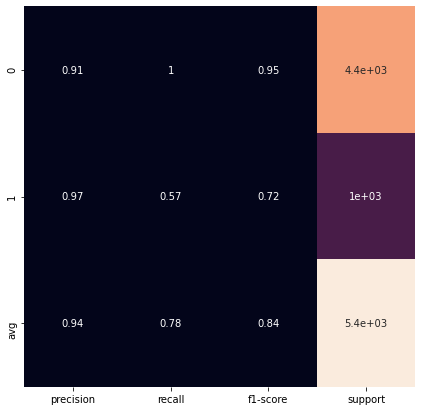

In [176]:
from sklearn.metrics import precision_recall_fscore_support



def plot_classification_report(y_tru, y_prd, figsize=(7, 7), ax=None):

    plt.figure(figsize=figsize)

    xticks = ['precision', 'recall', 'f1-score', 'support']
    yticks = list(np.unique(y_tru))
    yticks += ['avg']

    rep = np.array(precision_recall_fscore_support(y_tru, y_prd)).T
    avg = np.mean(rep, axis=0)
    avg[-1] = np.sum(rep[:, -1])
    rep = np.insert(rep, rep.shape[0], avg, axis=0)

    sn.heatmap(rep,
                annot=True, 
                cbar=False, 
                xticklabels=xticks, 
                yticklabels=yticks,
                ax=ax)

plot_classification_report(Y_test, y_pred)

In [177]:
 from sklearn.metrics import plot_confusion_matrix

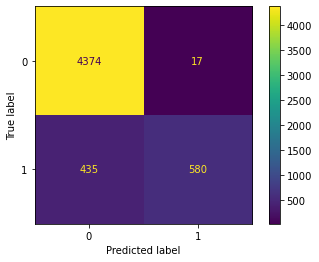

In [178]:
plot_confusion_matrix(random_forest, X_test, Y_test);